# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23,423,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,17565,3686,4657,1059,1803,668
2,4446,906,1238,3576,153,1014


In [5]:
samples.sum(axis=1)

0    110829
1     29438
2     11333
dtype: int64

In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
Index 0: Super market: 
Because not only is the grocery value much higher than the mean, But also the dairy and fresh values are much higher than the mean value. And also,all the rest of the features are above mean.

Index 1: Restaurant:
Because the value for Fresh feature is above 75%.
The value for milk,grocery and frozen is around 50%.

Index 2: Small scale food truck:
Because the value for frsh food is around 25%.
and The amount of detergent needed is really low between 0-25%. A food truck would NOT be needing a lot of detergent.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis=1,inplace=False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data,data['Detergents_Paper'],test_size=0.25,random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print(score)

C:\Users\HP\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.728655181254


# Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I chose to predict Detergents_Paper because by looking at the data I saw that Detergents_Paper somehow depends on the other features. That is,It is low when all the other features are low and vice versa.

The predcition score is 0.729. Which partially proves my above intuition.

Looking at it from the information gain point of view,It is not needed to identify the customer's spending needs.

But having said that,This alone can, in a way, predict a customer's spending habits. My intuition would be that if a customer is spending a lot on detergents,then she'll probably be spending more in general.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

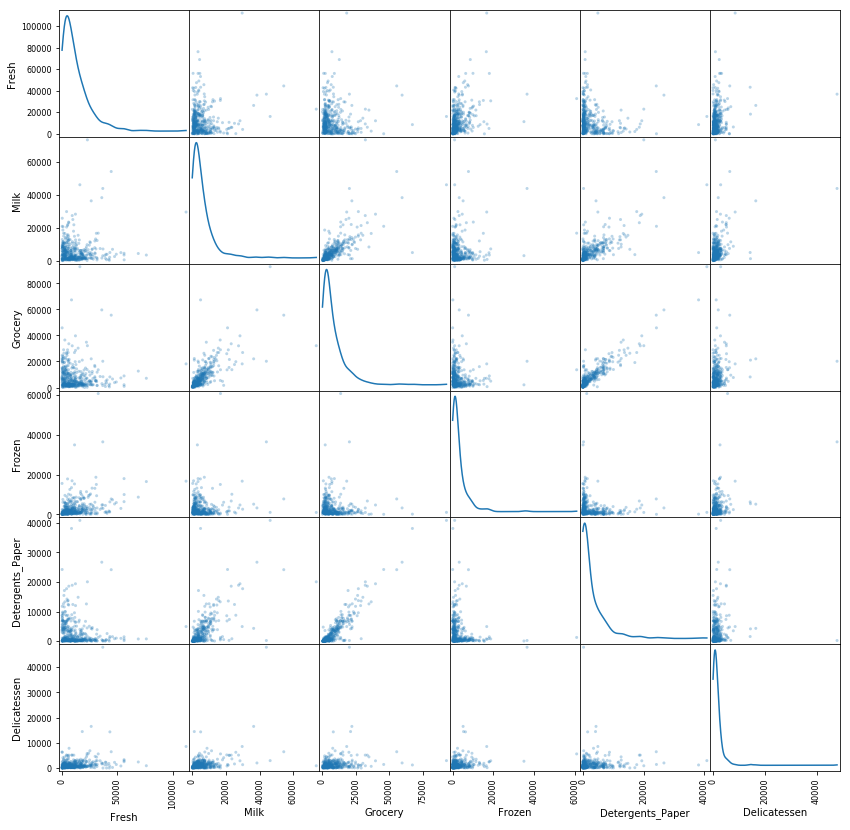

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

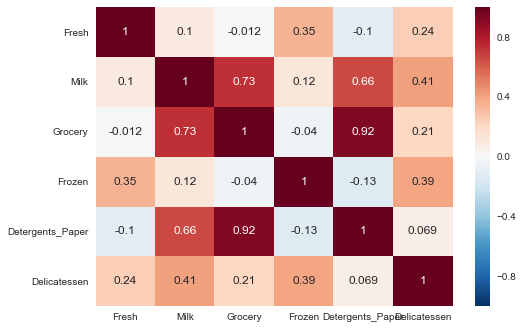

In [9]:
import seaborn as sbs
sbs.heatmap(data.corr(),annot=True)

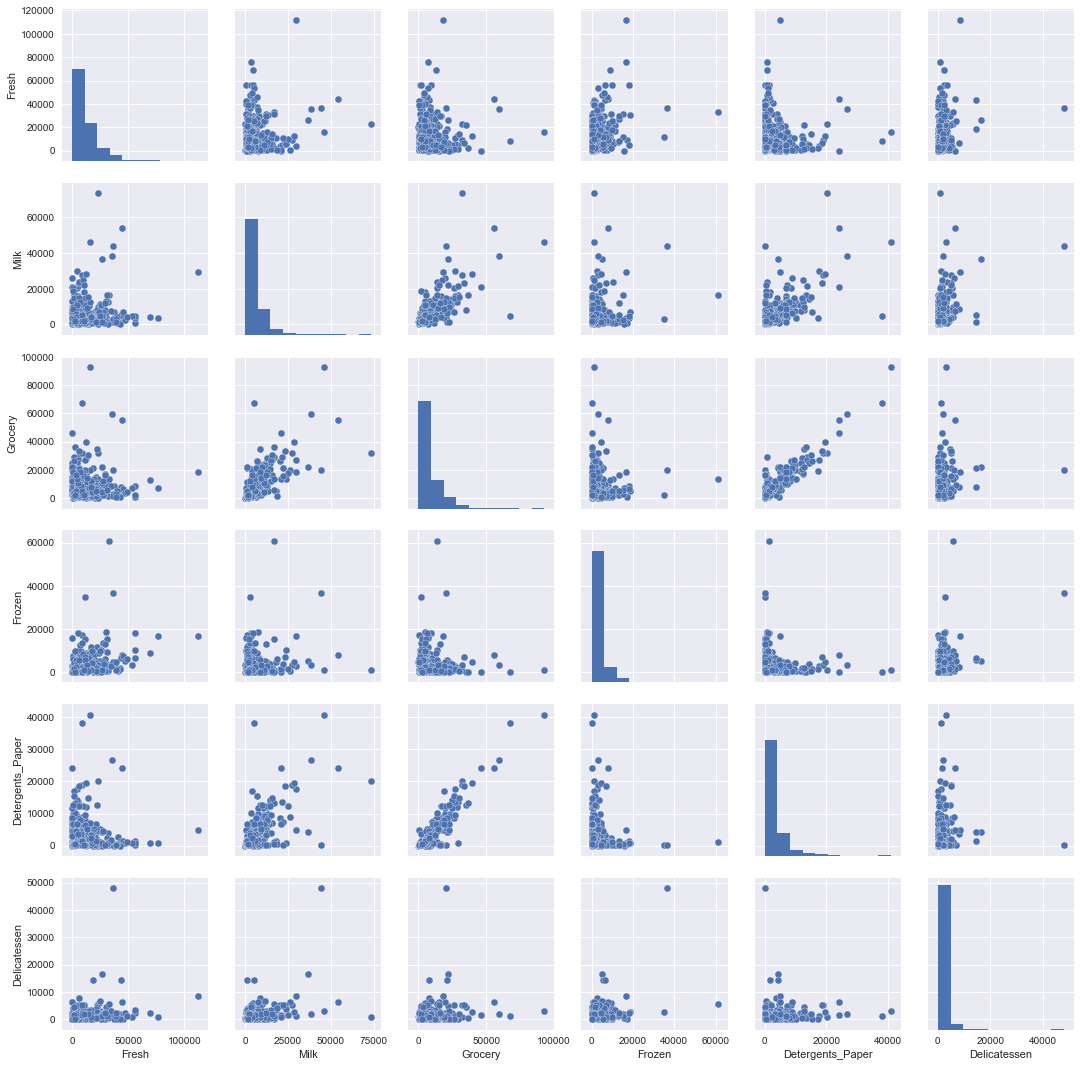

In [10]:
sbs.pairplot(data)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
No. The data is not normally distributed. The data is mostly well modeled ,but for the fact that it's skewed,with the exception of outliers.

There are very few outliers though. There are about a few in every plot. Delicatessen seems to have an outlier point with every other feature. These outliers will probably influence scaling in a bad way in the future.

There are a large number of data points near zero which means that the distribution is more dense near 0 as compared to near the maximum.

Yes,A high correlation is exhibited by Detergent_Paper and Grocery. The value for correlation for the pair 0.92 which means both are correlated and hence explains why we had high scores of regressor while dropping them and predicting them using other features.

Grocery and Detergent_Paper also showed a relatively high corelation with a value of 0.73 and 0.66 respectively.

Yes,This shows that Detergent_Paper is less important while identifying similar customers and hence relatively less relevant.

The data of other more relevant features are dense near the origin which shows that most of the customers are on the lower side of each feature in particular.




## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\HP\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


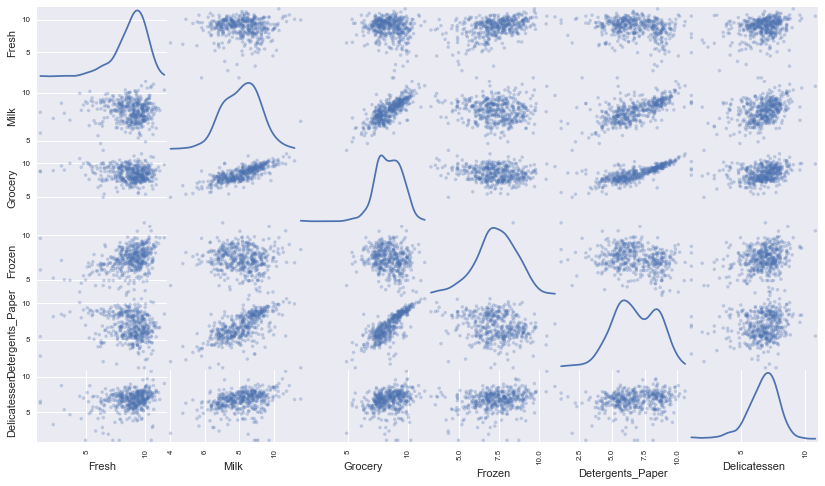

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

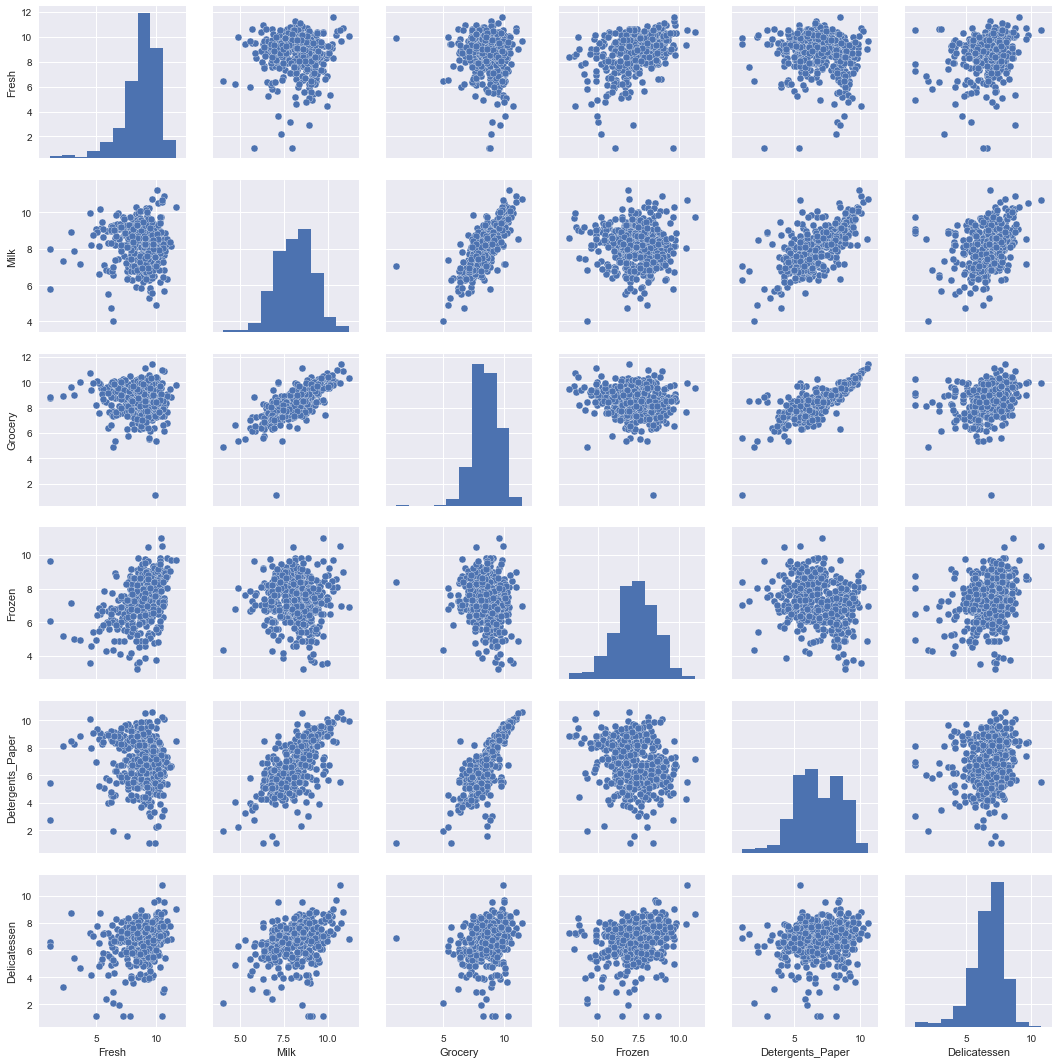

In [12]:
sbs.pairplot(log_data)

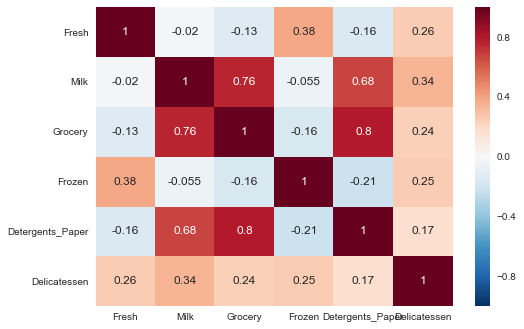

In [13]:
sbs.heatmap(log_data.corr(),annot=True)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,9.773664,8.212297,8.446127,6.965080,7.497207,6.504288
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
outliers=[]
count=0
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    leng=0
    # Display the outliers
    print "Data points considered outliers for the feature '{}'".format(feature)
    feature_outliers=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    outliers+=feature_outliers.index.tolist()
    leng=len(feature_outliers)
    count+=leng
# OPTIONAL: Select the indices for data points you wish to remove

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print 'The number of outliers removed were {}'.format(len(outliers))

Data points considered outliers for the feature 'Fresh'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen'


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The number of outliers removed were 48


In [17]:
good_data.shape

(398, 6)

In [18]:
outDF=pd.DataFrame(outliers)
print(outDF)

      0
0    65
1    66
2    81
3    95
4    96
5   128
6   171
7   193
8   218
9   304
10  305
11  338
12  353
13  355
14  357
15  412
16   86
17   98
18  154
19  356
20   75
21  154
22   38
23   57
24   65
25  145
26  175
27  264
28  325
29  420
30  429
31  439
32   75
33  161
34   66
35  109
36  128
37  137
38  142
39  154
40  183
41  184
42  187
43  203
44  233
45  285
46  289
47  343


In [19]:
outDF.keys()

RangeIndex(start=0, stop=1, step=1)

In [20]:
for i in range(0,48):
    for j in range(0,48):
        if i!=j:
           if outDF[0][i]==outDF[0][j]:
              print i
              print j
            

0
24
1
34
5
36
18
21
18
39
20
32
21
18
21
39
24
0
32
20
34
1
36
5
39
18
39
21


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
Yes,The data points considered outliers for more than 1 feature are:
65 - Fresh, Frozen
66 - Fresh, Delicatessen
154 - MIlk, Grocery
128 - Fresh, Delicatessen
75 - Deteregent_Paper,Grocery

Yes,These points need to be removed from the dataset they probably belong to customer who's very unique. Too unique for us o consider him/her for our classification. Considering her would only make the future process worse.

I've added every point that is an outlier for any one given feature to the outliers because while scaling these points would just give a wrong idea about the distribution. For eg,consider the case wherein we are using min/max scaler and say there's a standalone point (outlier) equal to 200 and the rest of the distribution is between 1 to 100. If we consider 200 as the maximum,the scaled value for 50 would 0.25 and all the scaled values would end up between 0 and 0.5. (not normal) We wouldn't want that to happen.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

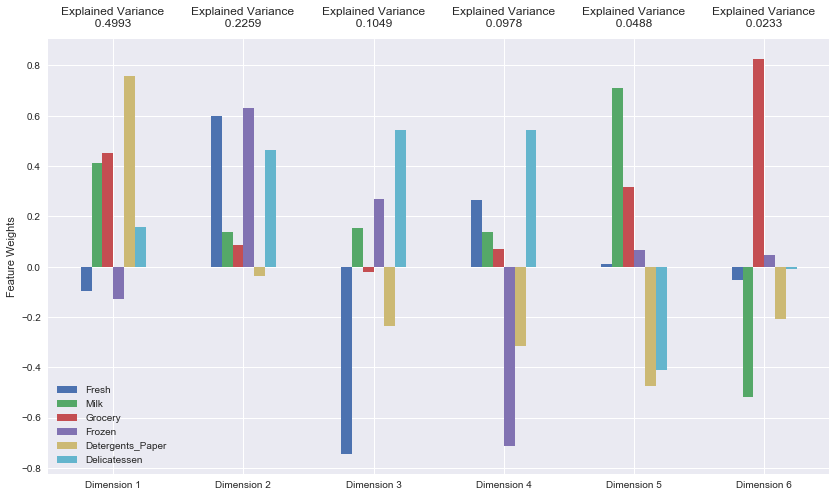

In [22]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6) # random_state only available from 0.18.0 onwards
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


In [23]:
pca.explained_variance_

array([ 4.09289242,  1.85213733,  0.85974573,  0.80182872,  0.39994943,
        0.19062795])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The variance of first 2  :
1st PC : 49.93 %
2nd PC : 22.59 %
Total  : 72.52 %

The variance of first 2  :
1st PC : 49.93 %
2nd PC : 22.59 %
3rd PC : 10.49 %
4th PC :  9.78 %
Total  : 92.79 %

1st dimension: This dimension shows a relatively higher cumulative variance of 49.93 % which is fairly high and means most of the information is represented by this dimention.

Milk,Grocery and DetergentPaper have a high postivie feature weight meaning higher the value of the component more is the value of PC. The information in them is best represented by 1'st PC.

2nd dimension: This dimension shows a relatively intermediate variance of 22.59 % which is intermediate and means some of the information is represented by this dimention. The cumulative variance is 72.52 %

Fresh, FRozen, Delicatessen have a high postivie feature weight meaning higher the value of the component more is the value of PC. The information in them is best represented by 2nd PC.

3rd dimention: This dimension shows a relatively low variance of 10.49 % % which is intermediate.
The cumulative variance is 83.01 %

Fresh has a large negative feature weight and hence greater the Fresh feature value lesser will be the value of 3rd PC.
Similary, Detergent has a intermediate negative value. Greater the Detergent feature value, lesser will the 3rd PC.

Delicatessen has a feature wight of about 0.5 which means greater the feature's value greater is the value of 3rd PC.

4th dimension: This dimension has a variance of 9.78 % which is low. The cumulative variance is 92.79 %.

Frozen has a high negatuve feature weight which means greater the feature value less will be the value of the 4th PC.

Delicatessen has a feature wight of about 0.5 which means greater the feature's value greater is the value of 4th PC.

5th dimention: This has a variance of 4.88 % which is low. Almost no information is represented by this dimention. The cumulative variance is 97.67

Milk has high positive feature weight meaning the value of milk feature positively influences the value of the 5th PC.

DetergentPaper and Delicatessen have negative feature wights of around 0.5, meaining the higher these values lower is the value of the PC.

6th dimension: The variance is as low as 2.33 %. and the cumulative variance is of course 100%

Grocery has a very large positive feature wieght which means the value of grocery mostly influences directly the value of 6th PC.

Milk also has a intermediate negative value and hence it's value inversely influences the value of the 6th PC.


What they might represent :

1st dimention: Cafe .
Due to high values of milk, grocery, Detergent.

2nd dimention: An Italian restaurant or any deli.
Due to the high values fresh,frozrn and delicatessen

3rd dimention : Deli
Due to low value for fresh and high value for delicatessen.

4th Dimention: Small Scale restaurants
A small restaurant would not be interested in frozen products and as more is the value of frozen less is the value of 4th dimention.









### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [24]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0921,3.2039,0.9108,1.0586,0.3270,-0.2987
1,0.5194,0.0629,-1.0642,0.1839,-0.1617,-0.2367
2,-2.4842,-0.0147,0.9005,-0.3315,-0.5147,0.0357


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [25]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [26]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0921,3.2039
1,0.5194,0.0629
2,-2.4842,-0.0147


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

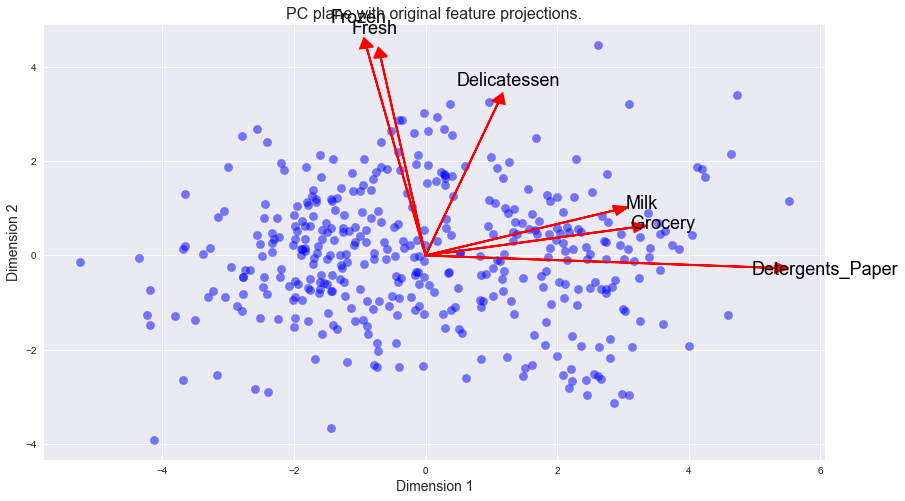

In [27]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
The advantages of using a k means algorithm are:
->It's simple in the sense that it can be visualised easily.
->The k means algorithm is only a genralisation of the Gaussian Mixture model. So if the data suites k means then applying k means will reduce the time complexity.
->Suppose we have a problem which demands hard clustering like the problem of dividing a population into male and female depending on the characterstics. Each person is either male or female. That is,male and female classes are mutually exclusive and hence,hard clustering. K means proves to be advantageous for problems like this.

The advantages of using a Gaussian Mixture Model algorithm are:
->We don't need to worry about the consequences of having made a wrong choice of choosing it over K means because apart from the time factor, we would probably end up with a correct solution as Gaussian Mixture Model can be seen as a superset of k means.
->This proves to be a boon for soft clustering problems such as this customer segments problem. (more about this is explained later).
->All the required assumptions are satisfied unlike k means which ignores some assumptions and just minimises the squared distance between the cluster center and data points.
->We will end up with more consistant solutions not dependant on initial cluster centers.


Given my observations about the wholesale customer data so far,
I will choose to use *Gaussian Mixture model(GMM) algorithm over K means clustering(KMC)* because :
->I think this is a soft clustering problem wherein the data points need NOT be hard linked to a particular cluster. Let's say we have clusters such as grocery shops and say,cafes. what if there's a data point which is a customer who owns both a cafe and a grocery shop at the same place? From the wholesale dealer's point of view it wouldn't be right to hard (single) link a data point to a particular cluster.
->As KMC assumes hard clustering,it wouldn't be appropriate to choose it for this problem. It'd rather be convenient to trade off time complexity and such advantages that KMC has over GMM.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
import warnings
warnings.filterwarnings('ignore')   

def compare(d):
    from sklearn.mixture import GMM
    from sklearn.metrics import silhouette_score
    clusterer = GMM(n_components=d,random_state=0)
    clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score
print "n_components:Score"
for i in range(2,13):
    print "{}           : {}".format(i,compare(i))
 

n_components:Score
2           : 0.443601474015
3           : 0.357294514249
4           : 0.291646368377
5           : 0.265822254317
6           : 0.307122866447
7           : 0.295333399467
8           : 0.301156045457
9           : 0.283717242517
10           : 0.262953734885
11           : 0.216129845154
12           : 0.181103632191


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The silhouette score for the tried clusters are reported in the above cell.

The one with n_components=2 has the best mean silhouette score which means almost all of the data points are about 44% similar on average to the cluster centers.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

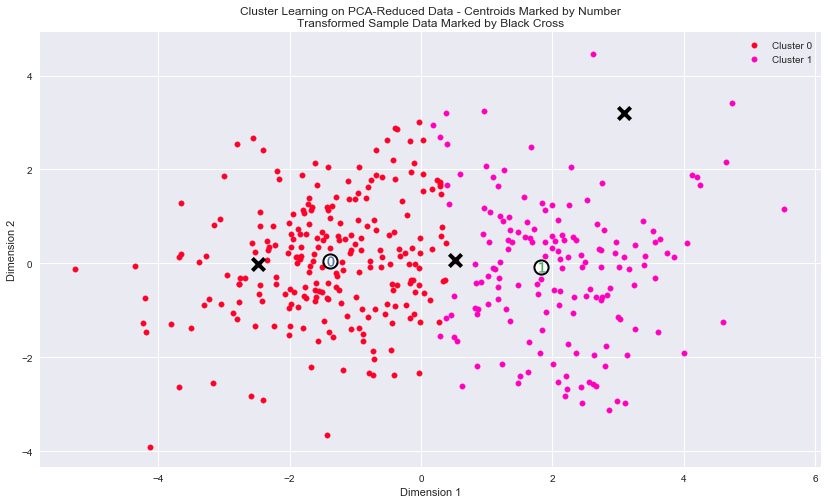

In [36]:
compare(2)
#As n_components was previously found to be optimal
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [38]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


In [41]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Segment 0 could be a cafe/small scale restaurant because:

->Although the value for fresh is lower than the mean of the population, It is relatively high.
->The value for fresh's mean is for the whole population and there might be higher values of fresh for supermarkets or retailer and hence is higher than our fresh value here.
->A cafe/restaurant would need detergent for only it's internal use and not for sale. Hence the low value.
->Grocery value is about 25% value reported above. which justifies because the grocery is just to prepare food and other (actual grocery shops) which sell grocery would have a higher grocery value and hence influence the mean and make it high.


Segment 1 could be a supermarket/reseller because:

->high values for grocery, milk and detergent which are above mean showing that these are bought by the supermarket and resold.
->Fresh value is about 50% of the mean which means the supermarket does buy fresh but not too high because fresh items tend to degrade with time and supermarkets tend to minimize loss due to expiry of fresh food and buy only as much as they need and NOT more.
->The value of 1159 for delicatessen as compared to the mean value of 1524 supports the argument in a way that supermarkets do sell delis but not as high as the establishments which exclusively sell delis.




### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [42]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
Sample point 0:

Segment 1 best represnts it as it has higher values for grocery,milk and detergent.

Yes,The prediction for this sample is consistant.

This data point was manually predicted to be a super market during the initial stages of this project which is consistant with the prediction above.

Sample point 1: 

Segment 1 best represents it due to the relatively higher values for Fresh,Grocery,milk,Detergent. Not segment 0 because it has lower value for milk (But the data point's milk value is comparitively high).

Yes,The prediction for this sample is consistant.

This data point was manually predicted to be a restaurant during the initial stages of this project. which is NOT consistant with the prediction. This might be the variance that is NOT explained by the pca wherein i feel this is not a smale scale restaurant but a restaurant which will also have a supermarket as a part of it..

Sample point 2:

Segment 0 best represents it because the data point has a higher value for fresh but lower values for milk,detergent and delies which is consistant with the values of means of the segment.

Yes,The prediction for this point is consistant.

This data point was initially predicted before hand by me as a small scale food truck whcich is partly consistant as a small scale food truck is a small scale restaurant in a way.




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Segment 0 customers would react negatively to the change because being a restaurant/cafe their whole purpose is to serve FRESH food. The less the number of days of delivery,the more they'll have prepare food using old ingredients which may directly affect the taste of the food and hence result in a loss.

Although the mean value for milk is 1920 as compared to the 7042 of segment 1. Segment 0 would get affected more by the change in delivery schedule of milk because restaurants/cafe's main attraction is Coffe/Tea which need milk. Segment 1 can even go without milk for a day or two because it's not their flagship ingredient/product.

Segment 1 would also react negatively(Not as nuch as segment 0 customers) but negative none the less because it would surely effect the quality and availabilty of products as quality and availabilty both deteriorate with time.

Keeping that in mind if a A/B test is to be conducted by the distributor, wherein let A be delivering 5 days a week which is already in place and B be delivering 3 days a week. The wholesale distributor will have to take subsets from each clusters sensibly and deploy A and B seperately and analyse the acceptibility of the delivery schedule and if the 3 days schedule proves to be largely accepted then the wholesale distributor can deploy the same to all of his/her customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Knowing the features and the engineered label(customer segment) we could easily use a supervised learner to predict the label values for the newly aquired data.

I would say an SVM would suite perfectly as the data is spatially divided into clusters and all SVM does is maximise the margin.

I would also consider naive bayes because the segment centers/means has a pattern which is (high values for fresh,grocery GIVEN high value for milk) will mean segment 1 and the (high values for fresh,grocery GIVEN low value for milk) would mean segment 0.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

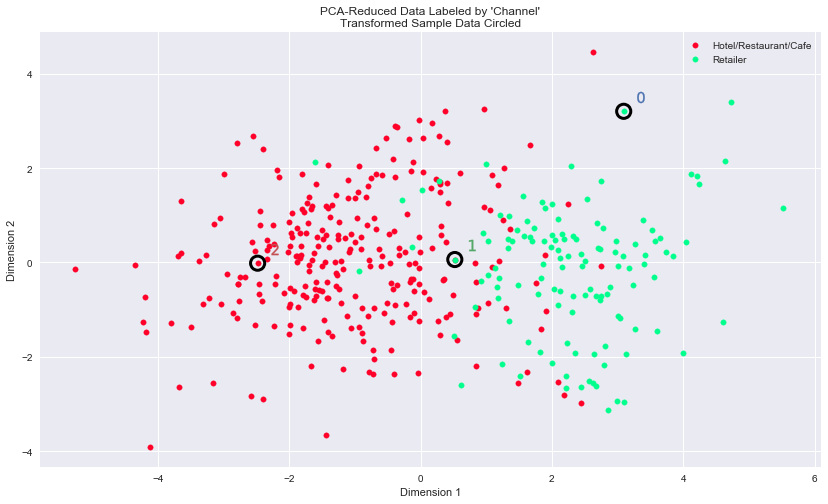

In [43]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
My results obtained using clustering is consistant with the above distribution except some outliers (mainly HoReKa red points on the right) which i think are restaurants whose operations are large scale and essentially buy stuff like a retailer.

The number of clusters that I chose based on the silhouette score was 2 and even that is consistant with the above distribution of HoReKa vs Retailers.


There are NOT any customer segments classified as purely 'Retailers' or 'HoReCa' because the HoReCa (red) points are also fairly populated on the right side.
Hence,Although the cluster on the left can be termed purely Retailers ,the cluster on the right can't be termed purely HoReCa.


Yes,I would consider these classifications to be consistant with my previous deficition of customer segments because i got the Cafe/restaurant part spot on. I called the other segment as supermarket/reseller which is NOT that far away from retailers. The reason for this consistancy is because the features of both HoReCa and retaiers have diffrent patterns. We just took the route of usng unsupervised learning and clustered data points without the knowledge of the labels.

As for the red points on the right,I feel some of them are part of the variance which we didn't choose to explain. The ones in the middle,that is. The ones which are in the heart of green points can be considered exceptions/ places where both a restaurant and a super market is present. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.